In [2]:
# importing all the required libraries
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random


from sklearn import ensemble, metrics, model_selection, preprocessing, tree
from matplotlib import pyplot
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# DATA

In [3]:
# reading the csv file
crime = pd.read_csv("Crimes_-_2001_to_Present.csv")
crime_df = pd.DataFrame(crime)
crime = crime_df
crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


# Cleaning

In [4]:
crime_df = crime_df.drop(["X Coordinate", "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location"], axis=1)

In [5]:
crime_df[["Date_clean", "Time"]] = crime_df["Date"].str.split(" ", n=1, expand=True)
crime_df[["Hour", "Min", "Sec"]] = crime_df["Time"].str.split(":", n=2, expand=True)
crime_df[["Month", "Day", "Yr"]] = crime_df["Date_clean"].str.split("/", n=2, expand=True)
crime_df[["sec_1", "AM_PM"]] = crime_df["Sec"].str.split(" ", n=1, expand=True)
crime_df["Hour_AM_PM"] = crime_df["Hour"] + crime_df["AM_PM"]
crime_df["IUCR_primary"] = crime_df["IUCR"].apply(lambda x: x[:2])
crime_df["IUCR_primary"] = crime_df["IUCR_primary"].astype(int)

In [7]:
crime_df = crime_df.dropna()

In [8]:
crime_df["Arrest"] = crime_df["Arrest"].map({True: 1, False: 0})  # Changing response variables into 0 and 1's 

crime_df["Domestic"] = crime_df["Domestic"].map({True: 1, False: 0})

In [9]:
# converting columns in types required
crime_df['District'] = crime_df['District'].astype(int)
crime_df['Month'] = crime_df['Month'].astype(int)
crime_df['Day'] = crime_df['Day'].astype(int)
crime_df['Hour'] = crime_df['Hour'].astype(int)
crime_df['Year'] = crime_df['Year'].astype(int)

In [10]:
# Quarter column
conditions = [(crime_df['Month'] <= 3), 
              (crime_df['Month'] <= 6), 
              (crime_df['Month'] <= 9),
              (crime_df['Month'] > 9)]

values = [1, 2, 3, 4]

crime_df['Quarter'] = np.select(conditions, values)

In [11]:
# Time column
conditions = [(crime_df['Hour_AM_PM'] == '12AM'), 
              (crime_df['Hour_AM_PM'] == '01AM'),
              (crime_df['Hour_AM_PM'] == '02AM'),
              (crime_df['Hour_AM_PM'] == '03AM'),
              (crime_df['Hour_AM_PM'] == '04AM'),
              (crime_df['Hour_AM_PM'] == '05AM'),
              (crime_df['Hour_AM_PM'] == '06AM'),
              (crime_df['Hour_AM_PM'] == '07AM'),
              (crime_df['Hour_AM_PM'] == '08AM'),
              (crime_df['Hour_AM_PM'] == '09AM'),
              (crime_df['Hour_AM_PM'] == '10AM'),
              (crime_df['Hour_AM_PM'] == '11AM'),
              (crime_df['Hour_AM_PM'] == '12PM'), 
              (crime_df['Hour_AM_PM'] == '01PM'),
              (crime_df['Hour_AM_PM'] == '02PM'),
              (crime_df['Hour_AM_PM'] == '03PM'),
              (crime_df['Hour_AM_PM'] == '04PM'),
              (crime_df['Hour_AM_PM'] == '05PM'),
              (crime_df['Hour_AM_PM'] == '06PM'),
              (crime_df['Hour_AM_PM'] == '07PM'),
              (crime_df['Hour_AM_PM'] == '08PM'),
              (crime_df['Hour_AM_PM'] == '09PM'),
              (crime_df['Hour_AM_PM'] == '10PM'),
              (crime_df['Hour_AM_PM'] == '11PM')]
               
values = [1, 1, 1, 1, 1, 1,
          2, 2, 2, 2, 2, 2,
          3, 3, 3, 3, 3, 3,
          4, 4, 4, 4, 4, 4]

crime_df['Time_of_Day'] = np.select(conditions, values)

In [12]:
crime_df = crime_df.drop(["ID", "Case Number", "Date", "Date_clean",
                          'Time', 'Min', 'Sec', 'sec_1', 
                          'AM_PM', "Description", "Hour_AM_PM"]
                         , axis=1)

crime_df.head()

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Hour,Month,Day,Yr,IUCR_primary,Quarter,Time_of_Day
0,082XX S INGLESIDE AVE,0810,THEFT,RESIDENCE,0,1,631,6,8.0,44.0,06,2018,12,9,1,2018,8,3,1
2,009XX E HYDE PARK BLVD,2024,NARCOTICS,STREET,1,0,233,2,5.0,41.0,18,2018,1,7,31,2018,20,3,3
3,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,STREET,0,0,2514,25,31.0,19.0,14,2018,4,12,19,2018,13,4,3
4,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,OTHER,0,0,811,8,23.0,56.0,11,2015,10,2,2,2015,11,1,2
5,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,RESIDENCE,0,0,412,4,8.0,45.0,11,2001,11,1,1,2001,11,1,2


In [13]:
len(crime_df)

7226910

# Descriptive Stats, Visualisations & Regressions

In [14]:
## Arrest Variable

from pandas.core.arrays.interval import value_counts
print(crime_df["Arrest"].count())
print(crime_df["Arrest"].value_counts(normalize=True))

7226910
0    0.742818
1    0.257182
Name: Arrest, dtype: float64


In [15]:
grY = crime_df.groupby("Year")

Y = grY["Arrest"].count()
Ya = grY["Arrest"].mean()
Y = pd.merge(Y, Ya, on="Year")

Text(0.5, 0, 'Year')

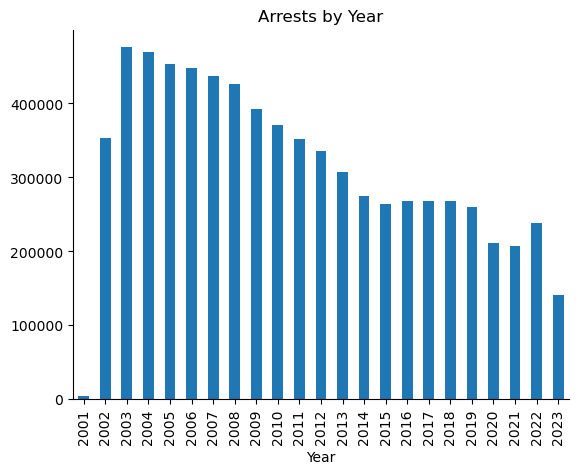

In [16]:
fig, ax = plt.subplots()

Y["Arrest_x"].plot(kind='bar', ax=ax)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Arrests by Year")
ax.set_xlabel("Year")

Text(0, 0.5, 'Arrest %')

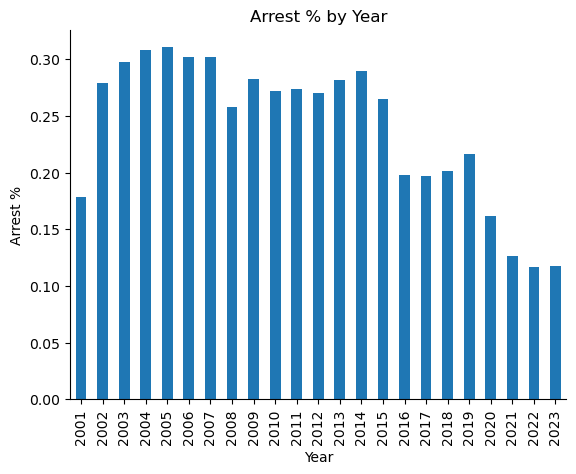

In [17]:
fig, ax = plt.subplots()

Y["Arrest_y"].plot(kind='bar', ax=ax)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Arrest % by Year")
ax.set_ylabel("Arrest %")

In [18]:
## Location Variable - Community Area
grca = crime_df.groupby("Community Area")

X1 = grca["Arrest"].count()
X1a = grca["Arrest"].mean()
X1 = pd.merge(X1, X1a, on="Community Area")

X1.reset_index(inplace=True)

ca = pd.read_csv("chicago_population.CSV")

X1.reset_index(inplace=True)
ca = pd.merge(ca, X1, on=["Community Area"])

In [19]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X1)

scaled = scaler.transform(X1)
standardized_df = pd.DataFrame(scaled, columns=X1.columns)

standardized_df = standardized_df.rename(columns={"Arrest_x": "Z_x", "Arrest_y": "Z_y"})

standardized_df["Community Area"] = X1["Community Area"]

st = standardized_df.set_index("Community Area")

In [20]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(ca)

scaled = scaler.transform(ca)
st_ca = pd.DataFrame(scaled, columns=ca.columns)
st_ca["Community Area"] = ca["Community Area"]
st_ca = st_ca.set_index("Community Area")

Text(0.5, 1.0, 'Relation between Income and Arrests')

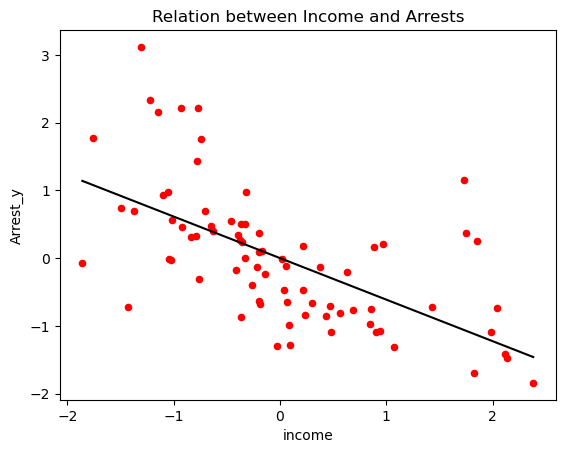

In [21]:
fig, ax = plt.subplots()

X = st_ca["income"]
Y = st_ca["Arrest_y"]

st_ca.plot(kind='scatter', x='income', y='Arrest_y', ax=ax, color='red')
ax.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), color='black')

ax.set_title('Relation between Income and Arrests')

Text(0.5, 1.0, 'Relation between Visbile Minoroity % and Arrests')

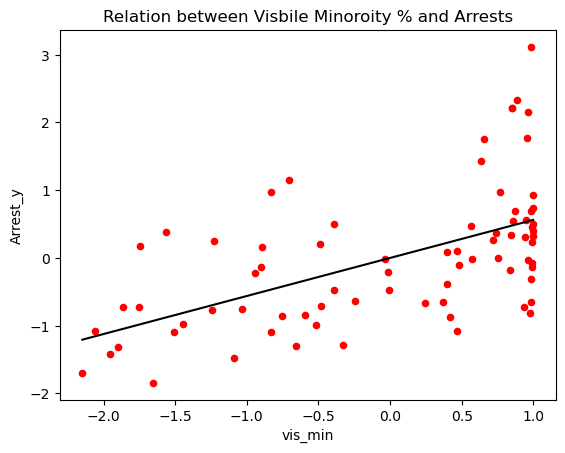

In [22]:
fig, ax = plt.subplots()

X = st_ca["vis_min"]
Y = st_ca["Arrest_y"]

st_ca.plot(kind='scatter', x='vis_min', y='Arrest_y', ax=ax, color='red')
ax.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), color='black')

ax.set_title('Relation between Visbile Minoroity % and Arrests')

Text(0.5, 1.0, 'Relation between Population and Arrests')

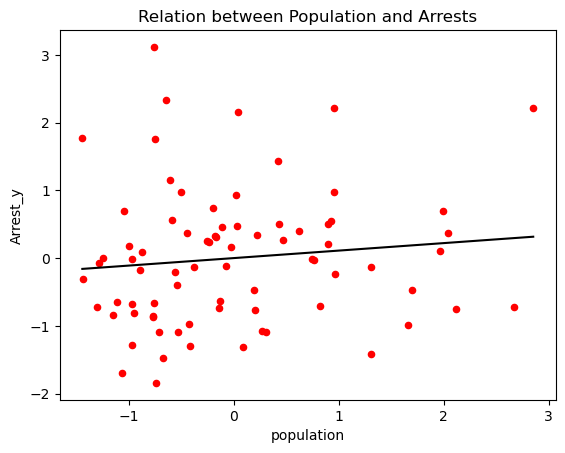

In [23]:
fig, ax = plt.subplots()

X = st_ca["population"]
Y = st_ca["Arrest_y"]

st_ca.plot(kind='scatter', x='population', y='Arrest_y', ax=ax, color='red')
ax.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), color='black')

ax.set_title('Relation between Population and Arrests')

Text(0, 0.5, 'Arrest %')

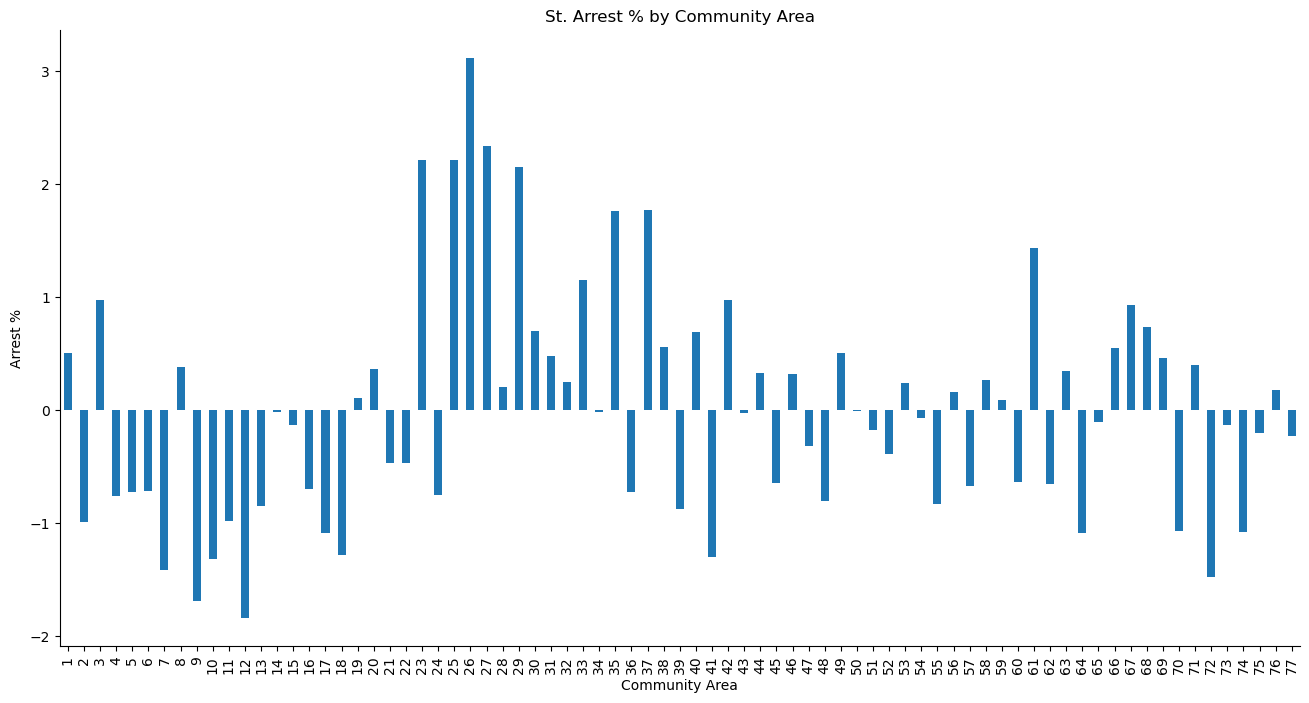

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))

st_ca["Arrest_y"].plot(kind='bar', ax=ax)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("St. Arrest % by Community Area")
ax.set_ylabel("Arrest %")


In [25]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

st_ca['const'] = 1
X1 = ['const', 'population']
X2 = ['const', 'income']
X3 = ['const', 'vis_min']
X4 = ['const', 'population', 'income', 'vis_min']

reg1 = sm.OLS(st_ca['Arrest_y'], st_ca[X1], missing='drop').fit()
reg2 = sm.OLS(st_ca['Arrest_y'], st_ca[X2], missing='drop').fit()
reg3 = sm.OLS(st_ca['Arrest_y'], st_ca[X3], missing='drop').fit()
reg4 = sm.OLS(st_ca['Arrest_y'], st_ca[X4], missing='drop').fit()

from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1, reg2, reg3, reg4],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'population',
                                             'income',
                                             'vis_min'])

results_table.add_title('OLS Regressions')

print(results_table)

                 OLS Regressions
                 Model 1 Model 2  Model 3 Model 4 
--------------------------------------------------
const            0.00    0.00     0.00    0.00    
                 (0.11)  (0.09)   (0.10)  (0.09)  
population       0.11                     0.23**  
                 (0.11)                   (0.09)  
income                   -0.61***         -0.48***
                         (0.09)           (0.16)  
vis_min                           0.56*** 0.20    
                                  (0.10)  (0.16)  
R-squared        0.01    0.38     0.32    0.43    
R-squared Adj.   -0.00   0.37     0.31    0.41    
R-squared        0.01    0.38     0.32    0.43    
No. observations 77      77       77      77      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [26]:
st_ca = st_ca.drop(['latinos', 'blacks', 'white',
       'asian', 'other', 'const'], axis=1)
crime_df = pd.merge(crime_df, st_ca, on=["Community Area"])

             Arrest_x  Arrest_y
Time_of_Day                    
1             1217326  0.210226
2             1470550  0.221729
3             2240826  0.257466
4             2298135  0.304466


Text(0.5, 1.0, 'Arrests by Time of Day')

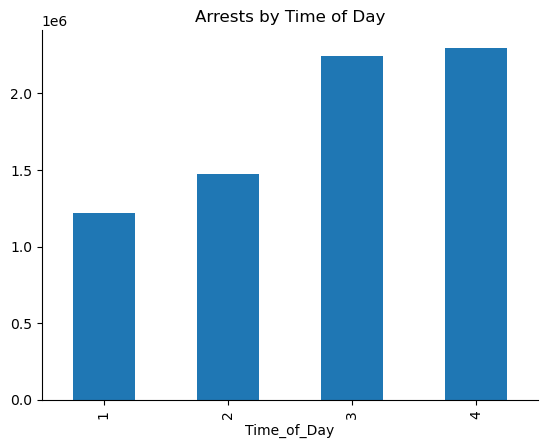

In [27]:
## Time of Day

grt = crime_df.groupby("Time_of_Day")

X2 = grt["Arrest"].count()
X2a = grt["Arrest"].mean()
X2 = pd.merge(X2, X2a, on="Time_of_Day")

print(X2)

fig, ax = plt.subplots()

X2["Arrest_x"].plot(kind='bar', ax=ax)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Arrests by Time of Day")

In [28]:
grl = crime_df.groupby("Location Description")
X3 = grl["Arrest"].count()
X3a = grl["Arrest"].mean()
X3 = pd.merge(X3, X3a, on="Location Description")

X3.sort_values("Arrest_x", ascending=False).head(20)



,Arrest_x,Arrest_y
Location Description,,
STREET,1857543,0.266621
RESIDENCE,1195296,0.130742
APARTMENT,855207,0.157324
SIDEWALK,694888,0.494101
OTHER,243339,0.178529
PARKING LOT/GARAGE(NON.RESID.),182977,0.200195
ALLEY,161134,0.433149
SMALL RETAIL STORE,139285,0.247478
"SCHOOL, PUBLIC, BUILDING",131966,0.304290


In [29]:
grq = crime_df.groupby("Quarter")
X = grq["Arrest"].count()
Xa = grq["Arrest"].mean()
X = pd.merge(X, Xa, on=["Quarter"])
print(X.sort_values("Quarter"))

         Arrest_x  Arrest_y
Quarter                    
1         1598135  0.275796
2         1904209  0.254292
3         1980537  0.249480
4         1743956  0.252032


                                      Arrest_x  Arrest_y
IUCR_primary Primary Type                               
1            HOMICIDE                    12364  0.467324
2            CRIM SEXUAL ASSAULT         25537  0.153033
             CRIMINAL SEXUAL ASSAULT      7167  0.073392
3            ROBBERY                    271607  0.092638
4            BATTERY                   1316312  0.219216
...                                        ...       ...
50           OTHER OFFENSE              108290  0.361843
             SEX OFFENSE                   892  0.128924
51           NON - CRIMINAL                 38  0.157895
             NON-CRIMINAL                   41  0.097561
             OTHER OFFENSE                4801  0.958550

[64 rows x 2 columns]


Text(0.5, 1.0, 'Relation between IUCR and Arrest %')

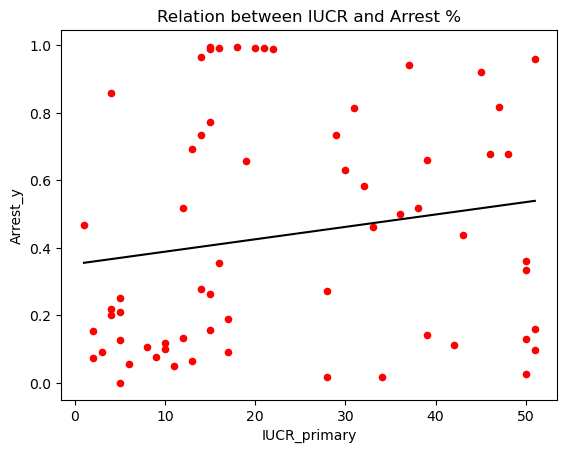

In [30]:
## Type of Crime - Primary Type & IUCR Codes

grty = crime_df.groupby(["IUCR_primary", "Primary Type"])
X4 = grty["Arrest"].count()
X4a = grty["Arrest"].mean()
X4 = pd.merge(X4, X4a, on=["IUCR_primary", "Primary Type"])

print(X4.sort_values("IUCR_primary"))

X4.reset_index(inplace=True)

fig, ax = plt.subplots()

X = X4["IUCR_primary"]
Y = X4["Arrest_y"]

X4.plot(kind='scatter', x='IUCR_primary', y='Arrest_y', ax=ax, color='red')
ax.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), color='black')

ax.set_title('Relation between IUCR and Arrest %')

In [31]:
## Domestic

grd = crime_df.groupby(["Domestic"])
X5 = grd["Arrest"].count()
X5a = grd["Arrest"].mean()
X5 = pd.merge(X5, X5a, on=["Domestic"])

print(X5)

crime_df['const'] = 1
X1 = ['const', 'vis_min', 'Domestic']
X2 = ['const', 'income', 'Domestic']
X3 = ['const', 'IUCR_primary', 'Domestic']


reg1 = sm.OLS(crime_df['Arrest'], crime_df[X1], missing='drop').fit()
reg2 = sm.OLS(crime_df['Arrest'], crime_df[X2], missing='drop').fit()
reg3 = sm.OLS(crime_df['Arrest'], crime_df[X3], missing='drop').fit()

from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1, reg2, reg3],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'vis_min',
                                             'income',
                                             'IUCR_primary',
                                             'Domestic'])

results_table.add_title('OLS Regressions')

print(results_table)

          Arrest_x  Arrest_y
Domestic                    
0          6213967  0.268663
1          1012870  0.186752
              OLS Regressions
                 Model 1  Model 2  Model 3 
-------------------------------------------
const            0.26***  0.26***  0.13*** 
                 (0.00)   (0.00)   (0.00)  
vis_min          0.04***                   
                 (0.00)                    
income                    -0.05***         
                          (0.00)           
IUCR_primary                       0.01*** 
                                   (0.00)  
Domestic         -0.10*** -0.10*** -0.06***
                 (0.00)   (0.00)   (0.00)  
R-squared        0.01     0.01     0.06    
R-squared Adj.   0.01     0.01     0.06    
R-squared        0.01     0.01     0.06    
No. observations 7226837  7226837  7226837 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


# Machine Learning

In [32]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

if crime_df["FBI Code"].dtype == object:
    crime_df["FBI Code"] = crime_df["FBI Code"].astype(str)
    crime_df["FBI Code"] = le.fit_transform(crime_df["FBI Code"])
elif crime_df["FBI Code"].dtype == object and crime_df["FBI Code"].dtype == bool :  #Can ignore this line
    crime_df["FBI Code"] = crime_df["FBI Code"].astype(str)
    crime_df["FBI Code"] = le.fit_transform(crime_df["FBI Code"])     
else:
    pass

In [33]:
crime_df["Arrest"] = pd.Series(crime_df["Arrest"])

In [34]:
dep = ['Domestic', 'Beat', 'District', 'Ward', 'Community Area', 
       'Month', 'Time_of_Day', 'population', 'income', 'vis_min', 'Arrest_x',
       'Arrest_y', 'IUCR_primary', 'FBI Code']

In [35]:
from sklearn.model_selection import train_test_split
y= crime_df["Arrest"]

x=crime_df[dep]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=25)

In [36]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

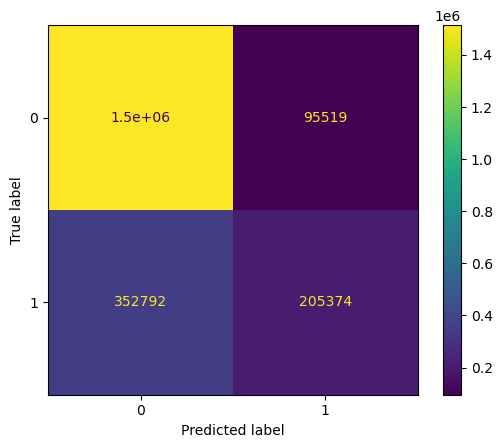

[0.7932194430760886]
[0.059332772631105556]
[0.3679443033076182]


FBI Code          1.141516
IUCR_primary     -0.357911
Arrest_y          0.319355
Domestic         -0.194965
Time_of_Day       0.149304
District         -0.110443
Beat              0.082673
population        0.030507
Month            -0.021669
income            0.020686
Ward             -0.018934
Arrest_x          0.005960
vis_min           0.004202
Community Area    0.003540
dtype: float64

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

scores = []
false_pos = []
recall = []

logit = LogisticRegression()
logit.fit(x_train_scaled, y_train)
l_score = logit.score(x_test_scaled, y_test)
scores.append(l_score)
y_pred=logit.predict(x_test_scaled)
cm = confusion_matrix(y_test, logit.predict(x_test_scaled))
disp = ConfusionMatrixDisplay(cm, display_labels=None)
disp.plot()
plt.show()

false_pos_rate = cm[0,1]/cm[0].sum()
false_pos.append(false_pos_rate)

recall_rate = cm[1,1]/cm[1].sum()
recall.append(recall_rate)

print(scores)
print(false_pos)
print(recall)

logit_features = pd.Series(logit.coef_.tolist()[0], index = list(x))
sorted_logit_features = logit_features.sort_values(ascending = False, key = abs)
sorted_logit_features


Accuracy: 0.7932194430760886
Precision: 0.6825482812827152


0.7502376722628695

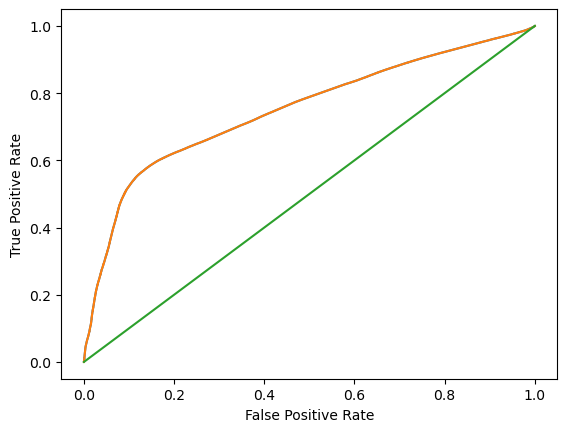

In [38]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

print("Precision:",metrics.precision_score(y_test, y_pred)) 

from sklearn.metrics import roc_curve, roc_auc_score

predictions = logit.predict_proba(x_test_scaled)
predictions
predictions[:,1]

fpr,tpr,threshold = roc_curve(y_test, predictions[:,1])

plt.plot(fpr,tpr)
plt.plot(fpr,tpr, fpr, fpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

auc_l = roc_auc_score(y_test, predictions[:,1])
auc_l

FBI Code          0.479072
IUCR_primary      0.300440
Month             0.070171
Beat              0.065621
Ward              0.027738
Time_of_Day       0.017206
Domestic          0.007708
Arrest_y          0.006921
vis_min           0.005597
Community Area    0.004887
Arrest_x          0.003782
income            0.003727
population        0.003586
District          0.003544
dtype: float64

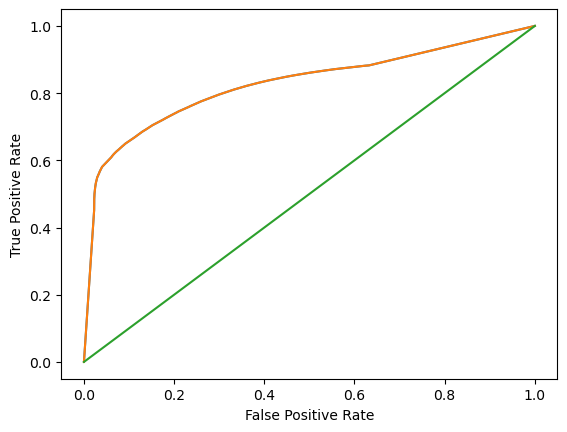

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train_scaled, y_train)
tree_score = tree.score(x_test_scaled, y_test)
tree_score

from sklearn.metrics import roc_curve, roc_auc_score
predictions = tree.predict_proba(x_test_scaled)
predictions
predictions[:,1]

fpr,tpr,threshold = roc_curve(y_test, predictions[:,1])

plt.plot(fpr,tpr)

plt.plot(fpr,tpr, fpr, fpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

auc_t = roc_auc_score(y_test, predictions[:,1])
auc_t

tree_features = pd.Series(tree.feature_importances_.tolist(), index = list(x))
sorted_tree_features = tree_features.sort_values(ascending = False, key = abs)
sorted_tree_features

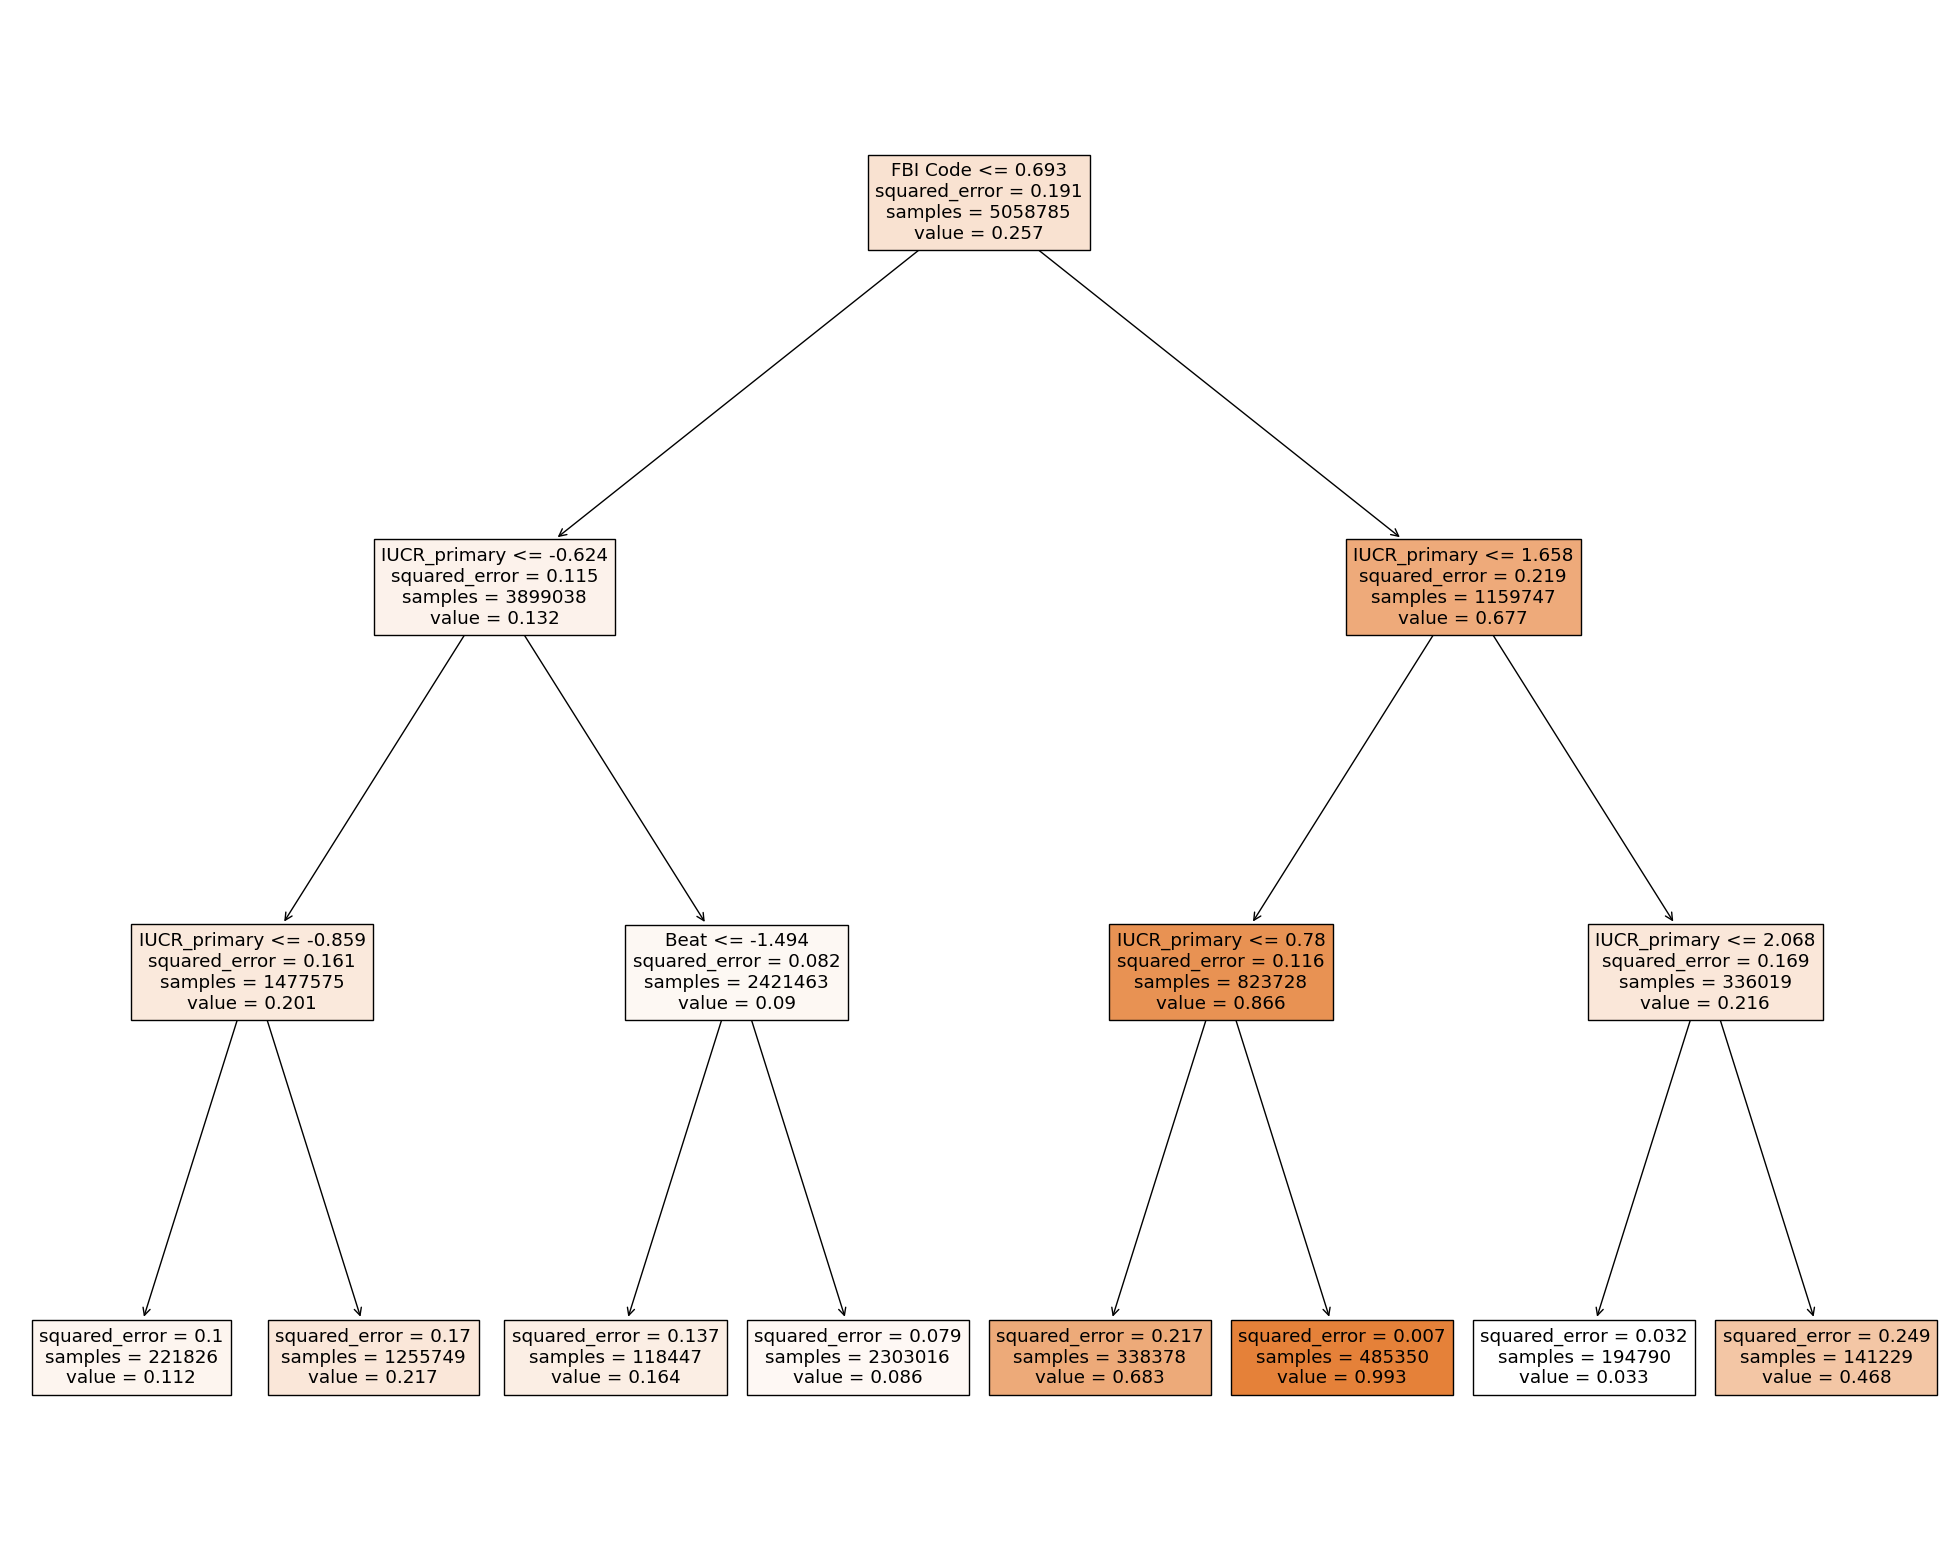

In [40]:
from sklearn import tree
d_tree = tree.DecisionTreeRegressor(max_depth=3).fit(x_train_scaled, y_train)
crime_fig = plt.figure(figsize=(25,20))
crime_fig = tree.plot_tree(d_tree, feature_names=x.columns, filled=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(x_train_scaled, y_train)
forest_score = forest.score(x_test_scaled, y_test)
forest_score

In [ ]:
predictions = forest.predict_proba(x_test_scaled)
# Plotting the ROC curve:
fpr,tpr,threshold = roc_curve(y_test, predictions[:,1])
plt.plot(fpr,tpr, fpr, fpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
auc_f = roc_auc_score(y_test, predictions[:,1])
auc_f

In [ ]:
forest_features = pd.Series(forest.feature_importances_.tolist(), index = list(x_train))
sorted_forest_features = forest_features.sort_values(ascending = False, key = abs)
sorted_forest_features

In [45]:
gnb = GaussianNB()
gnb = gnb.fit(x_train_scaled, y_train)
gnb_score = gnb.score(x_test_scaled, y_test)
gnb_score

predictions = gnb.predict_proba(x_test_scaled)
# Plotting the ROC curve:
fpr,tpr,threshold = roc_curve(y_test, predictions[:,1])
plt.plot(fpr,tpr, fpr, fpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

auc_f = roc_auc_score(y_test, predictions[:,1])
auc_f

In [46]:
models = [
          ('LogReg', logit),('RF', forest) ,('Tree', tree), ('Naive_Bayes', gnb)
            ]  #('RF', rf),

dfs = []
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'roc_auc']
for name, model in models:
        kfold = model_selection.KFold(n_splits=2, shuffle=True, random_state=0) 
        cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
        Modelo = model.fit(x_train, y_train) # fit the model with data
        y_pred = Modelo.predict(x_test)
        print(name)
        print(classification_report(y_test, y_pred))
results.append(cv_results)
names.append(name)
Midway_data = pd.DataFrame(cv_results)
Midway_data['model'] = name
dfs.append(Midway_data)
final = pd.concat(dfs, ignore_index=True)
final

C:\Users\Vivaan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vivaan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

KeyboardInterrupt: 